# Loading all modules and packages

In [1]:
!pip install xgboost

In [2]:
import pandas as pd
from xgboost import XGBClassifier
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OrdinalEncoder
from keras.models import Sequential
from keras import regularizers
from keras.layers import Dense,Dropout
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Data description

In [3]:
dataset=pd.read_csv(r"C:\Users\Acer\titanicnotebook\titanic_train.xlsx - Worksheet.csv")
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataset.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
print(dataset.shape)

(891, 12)


In [6]:
print(dataset.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [7]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
len(dataset)

891

In [9]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Exploratory Data Analysis (EDA)

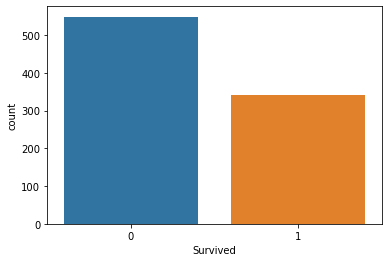

In [11]:
sns.countplot(x=dataset['Survived'])
plt.show()

The above graph explain the survival rate thorugh bar plot

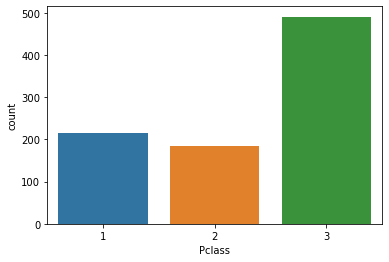

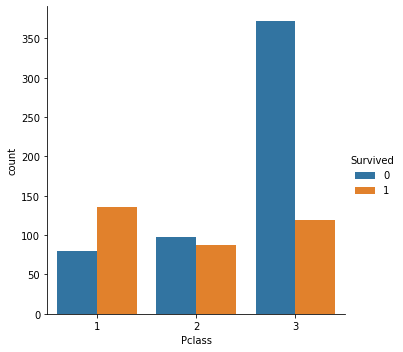

In [12]:
sns.countplot(x=dataset['Pclass'])
sns.catplot(x ="Pclass", hue ="Survived", kind ="count", data = dataset)
plt.show()

As we can see from above graph most people were in the 3rd Pclass and most of them died.But 1st Pclass has the least death and most survival rate amongst all.Hence Pclass is a very important feature in the dataset

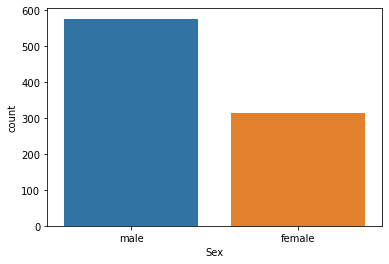

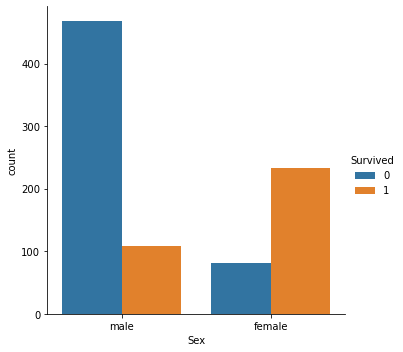

In [13]:
sns.countplot(x=dataset['Sex'])
sns.catplot(x ="Sex", hue ="Survived", kind ="count", data = dataset)
plt.show()

We can see from above graph that male were more than female and it was male also who died the most

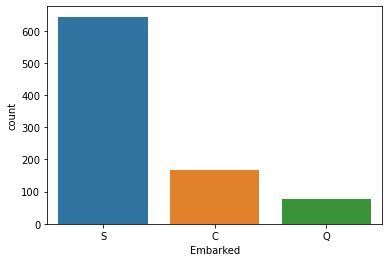

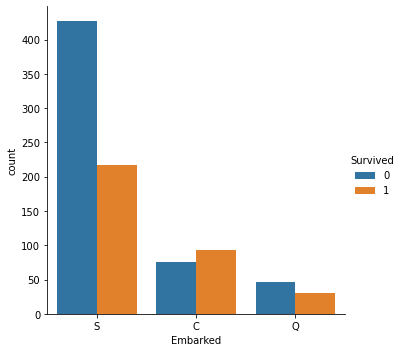

In [14]:
sns.countplot(x=dataset['Embarked'])
sns.catplot(x ="Embarked", hue ="Survived", kind ="count", data = dataset)
plt.show()

The Embarked S had the most passengers and there only the most people survived and died.So the null values of Embarked can be filled with S

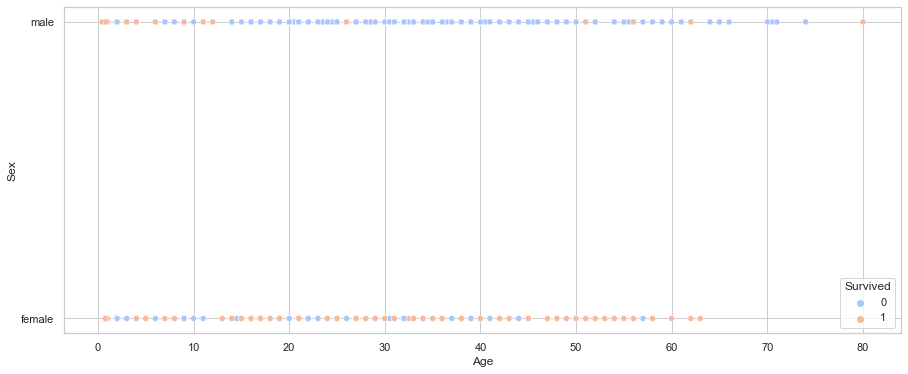

In [15]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))
sns.scatterplot(data=dataset, x='Age', y='Sex', hue='Survived', palette='coolwarm')
plt.legend(title='Survived', loc='best')
plt.show()

from above scatter plot we can come to conclusion that :-
1.Mostly men died in the dataset
2.the age range of 20-50 died the most in the dataset in both men and women
3.women died far less than men
4.infants and children have good survival rate
5.Men death rate increases as age increases.

<AxesSubplot:xlabel='Fare_Range', ylabel='Survived'>

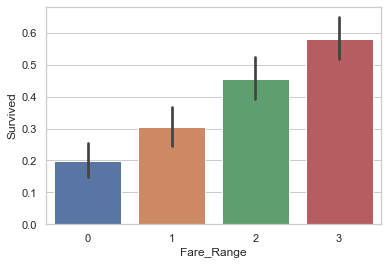

In [16]:
dataset['Fare_Range'] = pd.qcut(dataset['Fare'],4, labels = [0, 1, 2, 3]).astype(int)
sns.barplot(x ='Fare_Range', y ='Survived', 
data = dataset)

as fare range is continuous we can divide it into separate bins so that we can get a better idea of the attribute.So higher the fare more chances of survival

In [17]:
imputer = SimpleImputer(strategy='mean')
imputer.fit(dataset[['Age']])
dataset['Age'] = imputer.transform(dataset[['Age']])

0      3
1      4
2      3
3      4
4      4
      ..
886    3
887    2
888    3
889    3
890    4
Name: age_Range, Length: 891, dtype: category
Categories (8, int64): [1 < 2 < 3 < 4 < 5 < 6 < 7 < 8]

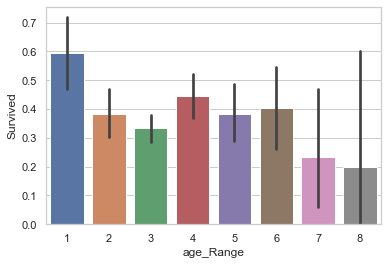

In [18]:
dataset['age_Range'] = pd.cut(dataset['Age'],bins=[0, 10, 20, 30, 40, 50, 60, 70, 80],labels=[ 1, 2, 3, 4, 5, 6, 7, 8])
sns.barplot(x ='age_Range', y ='Survived', 
data = dataset)
dataset['age_Range']

as age is also continuous ,we can also divide it into several bins ,here we can easily see that infants survived the most and old aged survived least

In [19]:
dataset['Age'].fillna(30, inplace=True) # as average value is age is 30
dataset['age_Range'].fillna(3, inplace=True) 

In [20]:
dataset['Embarked'].fillna('S',inplace=True) 

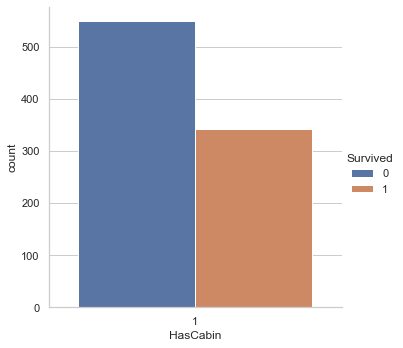

In [21]:
dataset['HasCabin']=dataset['Cabin'].apply(lambda x: 0 if x==None else 1 )
sns.catplot(x ="HasCabin", hue ="Survived", kind ="count", data = dataset)

We can also assume the fact that many cabins have not been given so they were not in any column.Therefore we can also create a feature HasCabin that can tell is a passenger had a cabin or not

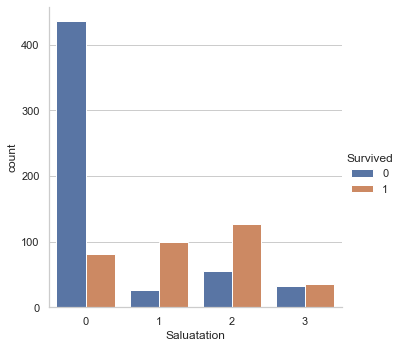

In [22]:
dataset['Saluatation']=dataset['Name'].apply(lambda x: 0 if "Mr." in x else (1 if "Mrs." in x else (2 if "Miss." in x else 3)))
sns.catplot(x ="Saluatation", hue ="Survived", kind ="count", data = dataset)

We can clearly see that Name should not be ignored since the salutation part can help us identifying survival rates of a passenger.Here the Mr saluatation has died the most whereas the Miss saluatation have survived the most

In [23]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Range,age_Range,HasCabin,Saluatation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,3,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3,4,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,3,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3,4,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,4,1,0


Below we can apply ordinalencoder on Sex feature since it has only 2 different values whereas OneHotEncoder in Embarked since it has 3 values thus creating a different column for each value

In [24]:
features=['Sex']
encoder = OrdinalEncoder(
        handle_unknown='use_encoded_value', 
        unknown_value=-1
    ).fit(dataset[features])
dataset[features]=encoder.transform(dataset[features])

In [25]:
encoder = OneHotEncoder()
one_hot_encoded = encoder.fit_transform(dataset[['Embarked']])
one_hot_df = pd.DataFrame(one_hot_encoded.toarray(), columns=encoder.get_feature_names_out(['Embarked']))
dataset=pd.concat([dataset,one_hot_df],axis=1)
one_hot_df.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [26]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Range,age_Range,HasCabin,Saluatation,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1.0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,3,1,0,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1,0,PC 17599,71.2833,C85,C,3,4,1,1,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0.0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,3,1,2,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1,0,113803,53.1000,C123,S,3,4,1,1,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",1.0,35.0,0,0,373450,8.0500,NaN,S,1,4,1,0,0.0,0.0,1.0


as parch and SibSp are no of parents and no of siblings so they can be added to sizeoffamily and if sizeoffamily is 0 then we can assume that person is alone

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


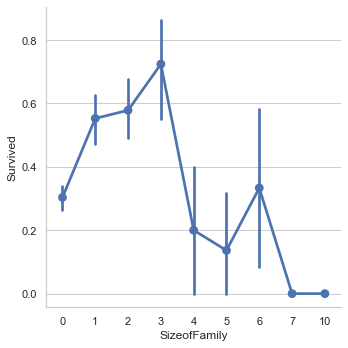

In [27]:
dataset['SizeofFamily']=dataset['Parch']+dataset['SibSp']
sns.factorplot(x ='SizeofFamily', y ='Survived', data = dataset)

we can se here that more the number of family member more chances of survival for a passenger but after 5 members the chances of survival decreases 

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


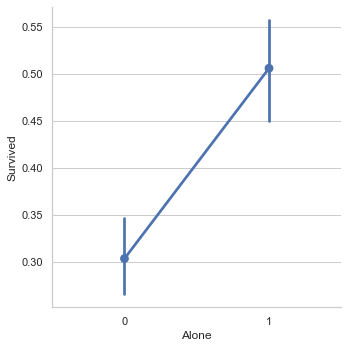

In [28]:
dataset['Alone']=  dataset['SizeofFamily'].apply(lambda x: 1 if x != 0 else 0)
sns.factorplot(x ='Alone', y ='Survived', data = dataset)

we will remove useless features that came out of EDA

In [29]:
dataset.pop('Parch')
dataset.pop('SibSp')
dataset.pop('Embarked')
dataset.pop('PassengerId')
dataset.pop('Name')
dataset.pop('Ticket')
dataset.pop('Cabin')
dataset.pop('Fare')
dataset.pop('Age')

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [30]:
target=dataset['Survived']
dataset.pop('Survived')

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Training of Different models based on different Algorithms

In [31]:
def train_models(model,i,arr):
    train_x,test_x,train_y,test_y=arr
    sscaler = StandardScaler()
    train_x = sscaler.fit_transform(train_x)
    test_x = sscaler.fit_transform( test_x)
    model_fitted=model.fit(train_x,train_y)
    predictions=model_fitted.predict(test_x)
    accuracy = accuracy_score(test_y, predictions)
    cm = confusion_matrix(test_y, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(i+ ' Confusion Matrix')
    plt.show()
    return {"Accuracy":accuracy,"ConfusionMatrix":cm}

In [32]:
classification_models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_jobs=-1, random_state=600),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Simple Neural Network': MLPClassifier(),
    'XG Boost classifier': XGBClassifier(random_state=42)
}

Model : Logistic Regression


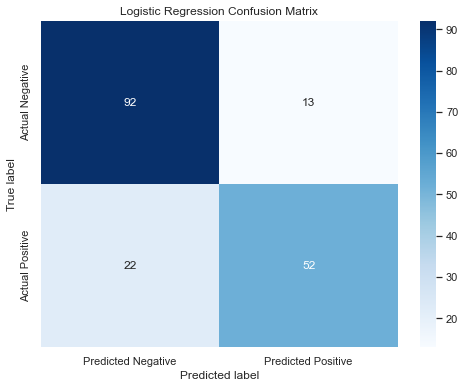

Accuracy of Logistic Regression model= 0.8044692737430168
Model : Decision Tree


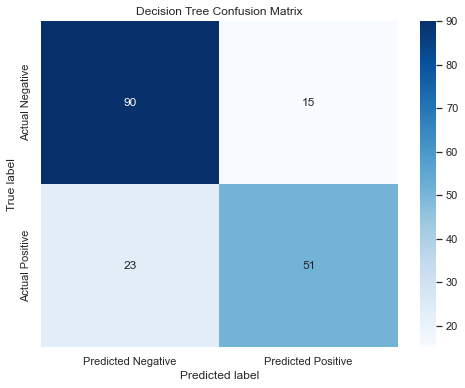

Accuracy of Decision Tree model= 0.7877094972067039
Model : Random Forest


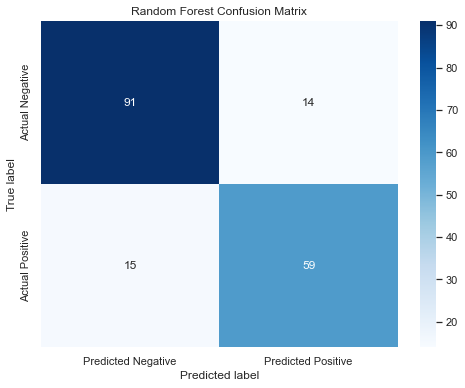

Accuracy of Random Forest model= 0.8379888268156425
Model : Gradient Boosting


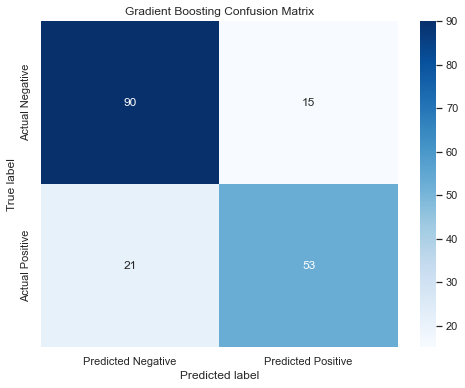

Accuracy of Gradient Boosting model= 0.7988826815642458
Model : SVM


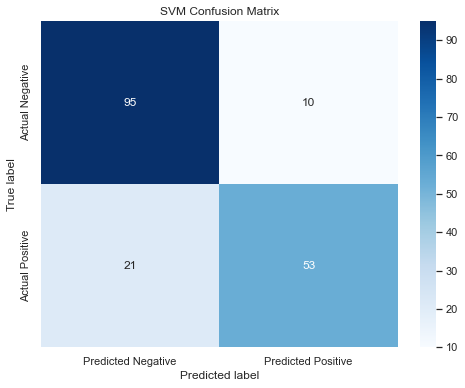

Accuracy of SVM model= 0.8268156424581006
Model : K-Nearest Neighbors


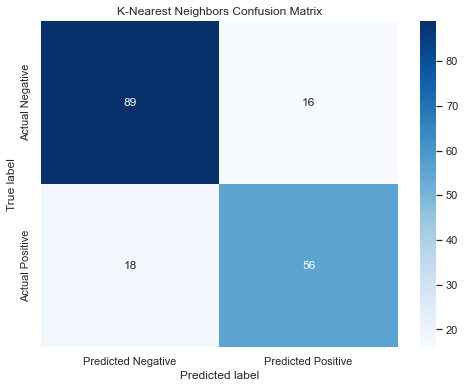

Accuracy of K-Nearest Neighbors model= 0.8100558659217877
Model : Naive Bayes


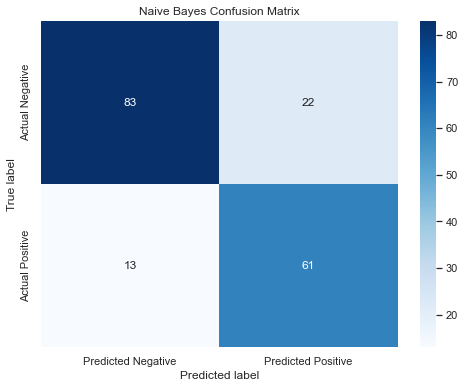

Accuracy of Naive Bayes model= 0.8044692737430168
Model : Simple Neural Network


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


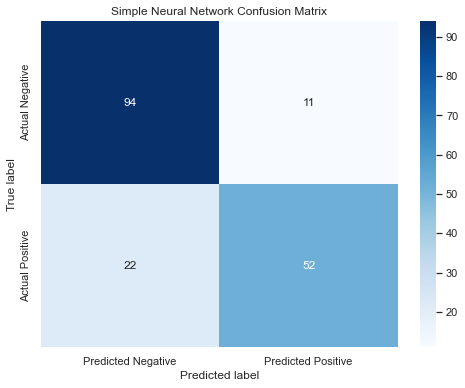

Accuracy of Simple Neural Network model= 0.8156424581005587
Model : XG Boost classifier


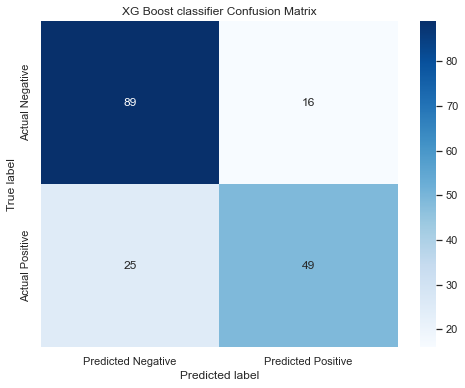

Accuracy of XG Boost classifier model= 0.770949720670391


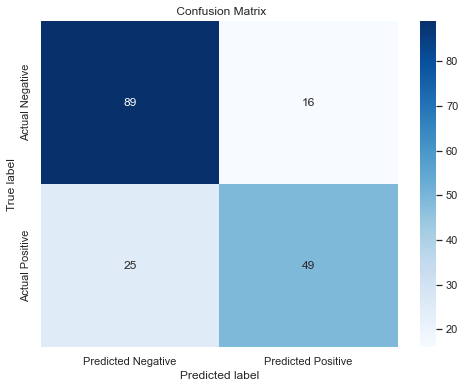

Best model= Random Forest Accuracy of best model= 0.8379888268156425


In [37]:
best_model=""
best_accuracy=-1
best_cm=None
for i in classification_models:
    print("Model : "+i)
    arr=train_test_split(dataset,target,test_size=0.2, random_state=42)
    result=train_models(classification_models[i],i,arr)
    accuracy=result["Accuracy"]
    cm=result["ConfusionMatrix"]
    print("Accuracy of "+i+" model= "+str(accuracy))
    if accuracy>best_accuracy:
        best_model=i
        best_accuracy=accuracy
        best_cm=cm
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title( ' Confusion Matrix')
plt.show()
print("Best model= "+best_model+" Accuracy of best model= "+str(best_accuracy))

# Training of Keras Dense model

In [41]:
X_train, X_test, y_train, y_test = train_test_split(dataset, target, test_size=0.2, random_state=78)
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=11))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu', ))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu', ))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu', ))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu',))
model.add(Dense(8, activation='relu', ))
model.add(Dropout(0.1))
model.add(Dense(4, activation='relu', ))
model.add(Dropout(0.1))
model.add(Dense(2, activation='relu',))
model.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l1(l1=0.01))) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
sscaler = StandardScaler()
X_train = sscaler.fit_transform(X_train)
model.fit(X_train, y_train, epochs=30, batch_size=50)

Epoch 1/30
15/15 [==============================] - 1s 5ms/step - loss: 0.6987 - accuracy: 0.6587
Epoch 2/30
15/15 [==============================] - 0s 5ms/step - loss: 0.6906 - accuracy: 0.7149
Epoch 3/30
15/15 [==============================] - 0s 5ms/step - loss: 0.6693 - accuracy: 0.7121
Epoch 4/30
15/15 [==============================] - 0s 5ms/step - loss: 0.6463 - accuracy: 0.7303
Epoch 5/30
15/15 [==============================] - 0s 4ms/step - loss: 0.6176 - accuracy: 0.7669
Epoch 6/30
15/15 [==============================] - 0s 4ms/step - loss: 0.6016 - accuracy: 0.7725
Epoch 7/30
15/15 [==============================] - 0s 4ms/step - loss: 0.5487 - accuracy: 0.7781
Epoch 8/30
15/15 [==============================] - 0s 5ms/step - loss: 0.4867 - accuracy: 0.7781
Epoch 9/30
15/15 [==============================] - 0s 4ms/step - loss: 0.4816 - accuracy: 0.7725
Epoch 10/30
15/15 [==============================] - 0s 4ms/step - loss: 0.4579 - accuracy: 0.7879
Epoch 11/30
15/15 [

In [42]:
X_test = sscaler.fit_transform( X_test)
arr=model.predict(X_test)

6/6 [==============================] - 0s 2ms/step


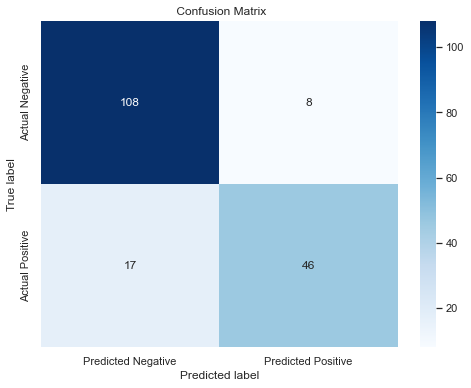

The Accuracy is 0.8603351955307262


In [43]:
arrset=[]
for i in arr:
    if i[0]>0.5:
        arrset.append(1)
    else:
        arrset.append(0)
acc = accuracy_score(y_test, arrset)
cm = confusion_matrix(y_test, arrset)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title( ' Confusion Matrix')
plt.show()
print("The Accuracy is "+str(acc))